 ## Problem Definition
 Analyze customer preferences and behaviors to identify key factors that influence customer satisfaction and purchasing decisions, enabling targeted marketing and product improvement strategies
 -

##### Column Details:

- Binary Columns (yummy, convenient, spicy, fattening, greasy, fast, cheap, tasty, expensive, healthy, disgusting): Values are "Yes" or "No"

- VisitFrequency: Categorical values like 'Every three months', 'Once a week', etc
- Gender: Male and Female

- Age: Numerical

- Like: Assuming it could be a rating or binary preference

## Data Cleaning:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter("ignore")


In [2]:
df=pd.read_csv("mcdonalds.csv")

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.shape

(1453, 15)

In [5]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [6]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [7]:
df['Like'].unique()


array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [8]:
df.duplicated().sum()

22

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)


In [11]:
# Encoding 'VisitFrequency'
visit_freq_map = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
df['VisitFrequency'] = df['VisitFrequency'].map(visit_freq_map)

# Encoding 'Gender' to binary (Male = 1, Female = 0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Display the first few rows after cleaning
print(df.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting Like  Age  VisitFrequency  Gender  
0        0           0   -3   61               2       0  
1        0           0   +2   51               2       0  
2        1           0   +1   62               2       0  
3        0           1   +4   69               4       0  
4        1           0   +2   49               3       1  


In [12]:
# Encode Like (numerical scale)
like_mapping = {'-3': -3, '+2': 2, '+1': 1, '+4': 4, 'I love it!+5': 5, 'I hate it!-5': -5, '-2': -2, '+3': 3, '0': 0, '-4': -4, '-1': -1}
df['Like'] = df['Like'].map(like_mapping)

In [13]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1


 ## Exploratory Data Analysis (EDA)

In [14]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000
mean,0.549266,0.907058,0.095038,0.866527,0.526904,0.898672,0.595388,0.642208,0.360587,0.200559,0.244584,0.758910,44.656184,2.378756,0.460517
std,0.497741,0.290453,0.293371,0.340204,0.499450,0.301868,0.490988,0.479518,0.480339,0.400559,0.429991,3.116595,14.199400,1.292992,0.498613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,45.000000,2.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,57.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,5.000000,1.000000


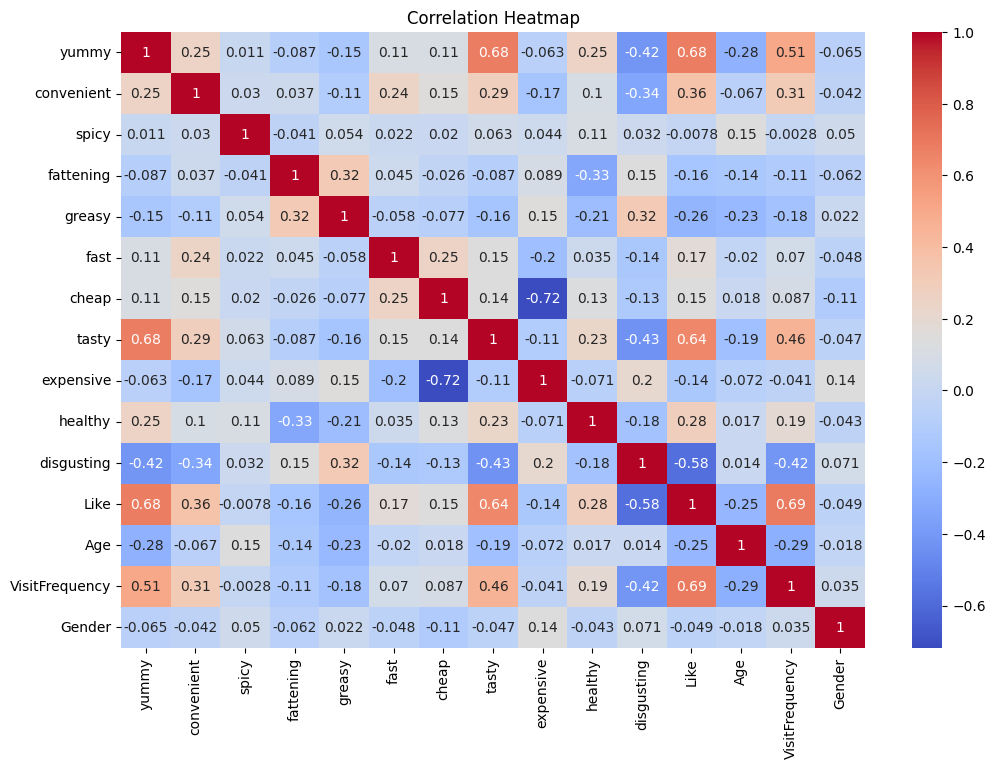

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

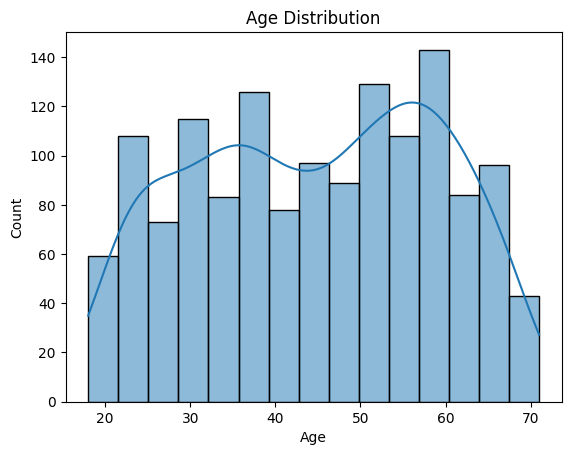

In [16]:
# Age distribution
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.show()

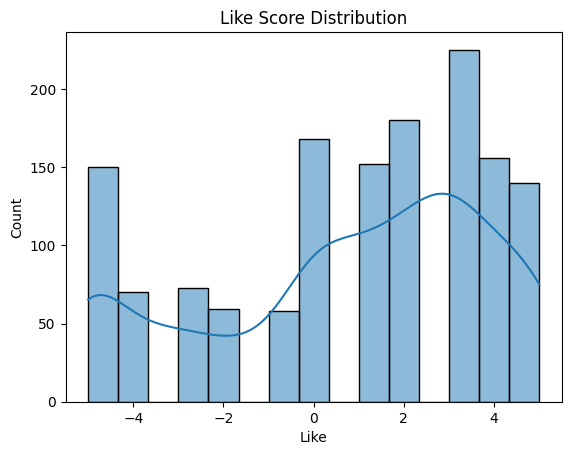

In [17]:
# Distribution of 'Like' scores
sns.histplot(df['Like'], kde=True)
plt.title('Like Score Distribution')
plt.show()

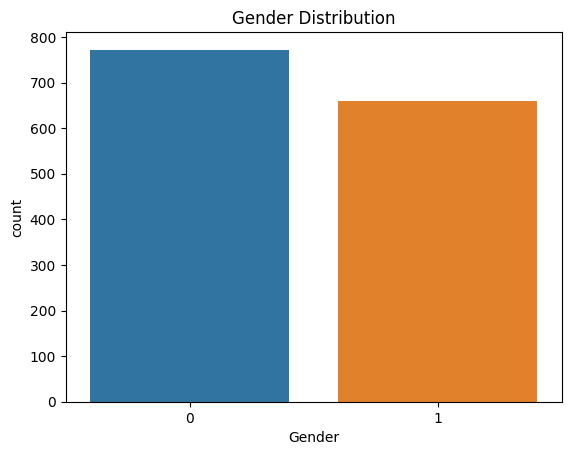

In [18]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

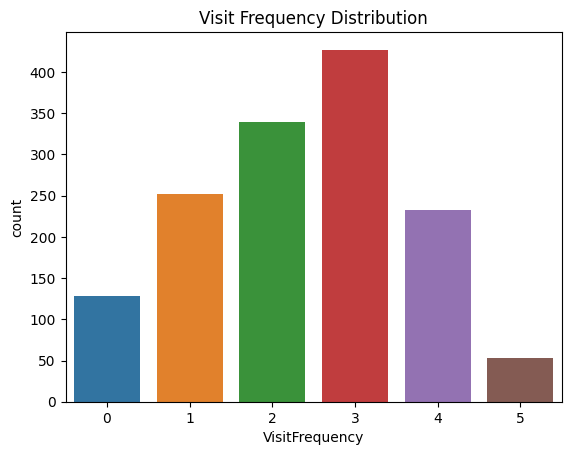

In [19]:
# Visit frequency distribution
sns.countplot(x='VisitFrequency', data=df)
plt.title('Visit Frequency Distribution')
plt.show()

### Feature Scaling & Clustering

In [20]:
# Selecting features for clustering

# Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pd.DataFrame(scaled_data).describe()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03
mean,-2.979215e-17,-8.379042e-17,1.241340e-17,-9.930716e-17,-5.461894e-17,5.958430e-17,-1.340647e-16,-6.206698e-17,-7.323903e-17,4.965358e-17,3.475751e-17,-2.234411e-17,1.365473e-16,-5.958430e-17,-2.979215e-17
std,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00
min,-1.103904e+00,-3.124004e+00,-3.240668e-01,-2.547969e+00,-1.055337e+00,-2.978081e+00,-1.213055e+00,-1.339747e+00,-7.509557e-01,-5.008734e-01,-5.690117e-01,-1.848467e+00,-1.877932e+00,-1.840373e+00,-9.239193e-01
25%,-1.103904e+00,3.201021e-01,-3.240668e-01,3.924694e-01,-1.055337e+00,3.357867e-01,-1.213055e+00,-1.339747e+00,-7.509557e-01,-5.008734e-01,-5.690117e-01,-5.645664e-01,-8.211797e-01,-1.066703e+00,-9.239193e-01
50%,9.058756e-01,3.201021e-01,-3.240668e-01,3.924694e-01,9.475642e-01,3.357867e-01,8.243649e-01,7.464096e-01,-7.509557e-01,-5.008734e-01,-5.690117e-01,7.738395e-02,2.422185e-02,-2.930324e-01,-9.239193e-01
75%,9.058756e-01,3.201021e-01,-3.240668e-01,3.924694e-01,9.475642e-01,3.357867e-01,8.243649e-01,7.464096e-01,1.331637e+00,-5.008734e-01,-5.690117e-01,7.193343e-01,8.696234e-01,4.806380e-01,1.082346e+00
max,9.058756e-01,3.201021e-01,3.085783e+00,3.924694e-01,9.475642e-01,3.357867e-01,8.243649e-01,7.464096e-01,1.331637e+00,1.996513e+00,1.757433e+00,1.361285e+00,1.855925e+00,2.027979e+00,1.082346e+00


In [21]:
# Choosing the optimal number of clusters (let's assume k=4 based on the Elbow curve)
kmeans = KMeans(n_clusters=2, init='k-means++')

kmeans.fit(scaled_data)

kmeans.inertia_


17350.717866925686

In [22]:
# Applying KMeans clustering
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


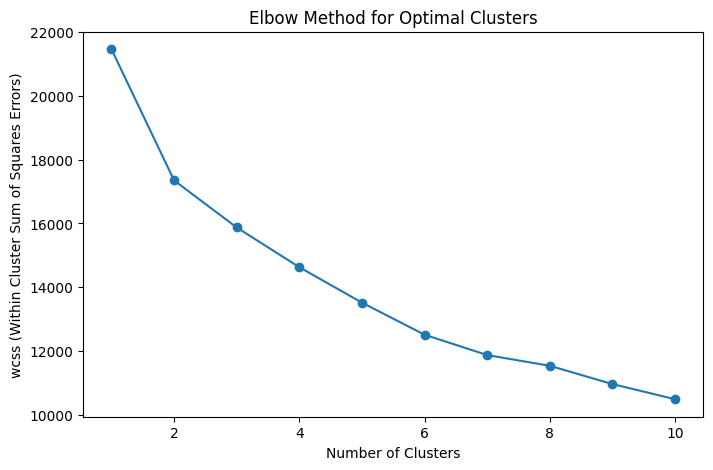

In [23]:
# Plotting the Elbow Curve to determine the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss (Within Cluster Sum of Squares Errors)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [24]:
# Choosing the optimal number of clusters (let's assume k=4 based on the Elbow curve)
kmeans = KMeans(n_clusters=4, init='k-means++')

kmeans.fit(scaled_data)

pred=kmeans.predict(scaled_data)

df=pd.DataFrame(scaled_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.103904,0.320102,-0.324067,0.392469,-1.055337,0.335787,0.824365,-1.339747,1.331637,-0.500873,-0.569012,-1.206517,1.151424,-0.293032,-0.923919
1,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,1.331637,-0.500873,-0.569012,0.398359,0.446923,-0.293032,-0.923919
2,-1.103904,0.320102,3.085783,0.392469,0.947564,0.335787,-1.213055,0.746410,1.331637,1.996513,-0.569012,0.077384,1.221874,-0.293032,-0.923919
3,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,-0.750956,-0.500873,1.757433,1.040309,1.715025,1.254308,-0.923919
4,-1.103904,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,-1.339747,-0.750956,1.996513,-0.569012,0.398359,0.306022,0.480638,1.082346


In [25]:
df['cluster']=pred
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster
0,-1.103904,0.320102,-0.324067,0.392469,-1.055337,0.335787,0.824365,-1.339747,1.331637,-0.500873,-0.569012,-1.206517,1.151424,-0.293032,-0.923919,2
1,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,1.331637,-0.500873,-0.569012,0.398359,0.446923,-0.293032,-0.923919,1
2,-1.103904,0.320102,3.085783,0.392469,0.947564,0.335787,-1.213055,0.746410,1.331637,1.996513,-0.569012,0.077384,1.221874,-0.293032,-0.923919,2
3,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,-0.750956,-0.500873,1.757433,1.040309,1.715025,1.254308,-0.923919,1
4,-1.103904,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,-1.339747,-0.750956,1.996513,-0.569012,0.398359,0.306022,0.480638,1.082346,2


In [26]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster
1426,-1.103904,0.320102,-0.324067,0.392469,0.947564,-2.978081,-1.213055,-1.339747,1.331637,-0.500873,1.757433,-1.848467,0.165122,-1.066703,1.082346,2
1427,0.905876,0.320102,-0.324067,0.392469,-1.055337,-2.978081,0.824365,0.746410,-0.750956,1.996513,-0.569012,0.398359,-0.609829,1.254308,-0.923919,1
1428,0.905876,0.320102,-0.324067,0.392469,-1.055337,0.335787,-1.213055,0.746410,1.331637,-0.500873,-0.569012,0.719334,0.517373,0.480638,-0.923919,1
1429,0.905876,0.320102,-0.324067,-2.547969,-1.055337,0.335787,0.824365,0.746410,-0.750956,1.996513,-0.569012,1.040309,-0.257579,-0.293032,1.082346,0
1430,-1.103904,0.320102,-0.324067,0.392469,0.947564,-2.978081,-1.213055,-1.339747,1.331637,-0.500873,1.757433,-1.206517,-1.032530,-0.293032,1.082346,2


In [27]:
df['cluster'].value_counts()

1    695
2    456
0    167
3    113
Name: cluster, dtype: int64

In [28]:
## function to take input standardize it and predict the cluster

def get_cluster_prediction():
    channel=int(input("Enter channel"))
    channel=int(input("Enter channel"))
    channel=int(input("Enter channel"))
    channel=int(input("Enter channel"))
    channel=int(input("Enter channel"))
    channel=int(input("Enter channel"))
    channel=int(input("Enter channel"))

In [29]:
from sklearn.metrics import silhouette_score

In [31]:
k_mean_score = silhouette_score(scaled_data, kmeans.labels_)
print("Silhouette Score: ", k_mean_score)

Silhouette Score:  0.18000190985220602


In [32]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You may need to tune eps and min_samples based on your data
dbscan.fit(scaled_data)

# Get cluster labels
dbscan_labels = dbscan.labels_


In [33]:
# Create DataFrame with your original feature names
df_dbscan = pd.DataFrame(scaled_data, columns=[
    'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 
    'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 
    'Like', 'Age', 'VisitFrequency', 'Gender'
])
df_dbscan['Cluster'] = dbscan_labels

# Display first few rows of the DataFrame
print("DBSCAN Clustering Results:")
dfdb=pd.DataFrame(df_dbscan)

DBSCAN Clustering Results:


In [34]:
dfdb.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,-1.103904,0.320102,-0.324067,0.392469,-1.055337,0.335787,0.824365,-1.339747,1.331637,-0.500873,-0.569012,-1.206517,1.151424,-0.293032,-0.923919,-1
1,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,1.331637,-0.500873,-0.569012,0.398359,0.446923,-0.293032,-0.923919,-1
2,-1.103904,0.320102,3.085783,0.392469,0.947564,0.335787,-1.213055,0.746410,1.331637,1.996513,-0.569012,0.077384,1.221874,-0.293032,-0.923919,-1
3,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,-0.750956,-0.500873,1.757433,1.040309,1.715025,1.254308,-0.923919,-1
4,-1.103904,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,-1.339747,-0.750956,1.996513,-0.569012,0.398359,0.306022,0.480638,1.082346,-1


In [35]:
# Optional: Calculate silhouette score if DBSCAN found more than one cluster

dbscan_score = silhouette_score(scaled_data, dbscan_labels)
print("Silhouette Score for DBSCAN:", dbscan_score)

Silhouette Score for DBSCAN: -0.3266663349172425


In [36]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)  # Adjust n_clusters as needed
hierarchical.fit(scaled_data)

# Get cluster labels
hierarchical_labels = hierarchical.labels_






In [37]:
# Create DataFrame with your original feature names
df_hierarchical = pd.DataFrame(scaled_data, columns=[
    'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 
    'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 
    'Like', 'Age', 'VisitFrequency', 'Gender'
])
df_hierarchical['Cluster'] = hierarchical_labels

# Display first few rows of the DataFrame
print("\nHierarchical Clustering Results:")
df_hierarchical=pd.DataFrame(df_hierarchical)
df_hierarchical.head()


Hierarchical Clustering Results:


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,-1.103904,0.320102,-0.324067,0.392469,-1.055337,0.335787,0.824365,-1.339747,1.331637,-0.500873,-0.569012,-1.206517,1.151424,-0.293032,-0.923919,1
1,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,1.331637,-0.500873,-0.569012,0.398359,0.446923,-0.293032,-0.923919,0
2,-1.103904,0.320102,3.085783,0.392469,0.947564,0.335787,-1.213055,0.746410,1.331637,1.996513,-0.569012,0.077384,1.221874,-0.293032,-0.923919,2
3,0.905876,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,0.746410,-0.750956,-0.500873,1.757433,1.040309,1.715025,1.254308,-0.923919,0
4,-1.103904,0.320102,-0.324067,0.392469,0.947564,0.335787,0.824365,-1.339747,-0.750956,1.996513,-0.569012,0.398359,0.306022,0.480638,1.082346,1


In [38]:
# Calculate silhouette score
hierarchical_score = silhouette_score(scaled_data, hierarchical_labels)
print("Silhouette Score for Hierarchical Clustering:", hierarchical_score)

Silhouette Score for Hierarchical Clustering: 0.15694038665347376


In [39]:
print('silhouette_score')
print("KMeans:",k_mean_score) 
print("DBSCAN:",dbscan_score)
print("Hierarchical:", hierarchical_score)


silhouette_score
KMeans: 0.18000190985220602
DBSCAN: -0.3266663349172425
Hierarchical: 0.15694038665347376


#### Conclusion:
- KMeans (Silhouette Score: 0.180): Forms clusters but with low cohesion and separation, indicating some overlap between clusters. Moderate performance but not optimal.
- DBSCAN (Silhouette Score: -0.326): Negative score suggests poor clustering, with many points incorrectly assigned or classified as noise. Requires parameter tuning.
- Hierarchical Clustering (Silhouette Score: 0.156): Similar to KMeans, shows weakly defined clusters with significant overlap. Performs slightly worse than KMeans.
- Overall: KMeans and Hierarchical Clustering offer slightly better but still suboptimal clustering. DBSCAN struggles significantly, indicating a need for parameter adjustments or a different approach.